In [ ]:
#هذه هي المكاتب الاساسية التي نحتاجها 
#optimizer تتضمن نوع ال 
#نوع المودل
#datasetادراج ال
#مكتبة الرسم
#np مكتبة
#الخاصةبالتعامل مع المصفوفات
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Flatten,Dropout
from keras.layers import  Input
from tensorflow.keras.optimizers import SGD,Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [ ]:
#load dataset
#تقسيم البيانات الى قسم للتدريب وقسم للاختبار
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()


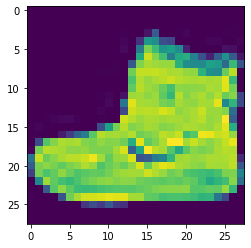

In [ ]:
#صورة احد الكلاسات من الداتا قبل القيام بعملية نورمالايزيتين
plt.imshow(x_train[0])

In [ ]:
#reshape the images
#اعادة تحجيم لصور التدريب وصور الاختبار للمقاس 28*28
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
#show shape test,train 
#للتأكد فقط من ابعاد امثلة التدريب والاختبار
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)


x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)


In [ ]:
#normalize images
#في هذه المرحلة نقوم بتحويل الصورة الى تدرجات الرمادي
#x_train=x_train/255.0
#x_test=x_test/255.0
x_train=np_utils.normalize(x_train)
x_test=np_utils.normalize(x_test)

In [ ]:
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

In [ ]:
#build the model
#ننشئ مودل يتكون من عدة طبقات داخلية وطبقة خرج 
#  one vectorتستخدم لتحويل الدخل ل Flatten 
#في طبقة الخرج وضعنا عددالنيورونات 10 لانه يصنف بين 10 اصناف
model= Sequential()
#طبقة الفلتر
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#تقلل هذهالطبقة دقة الصورة 
model.add(MaxPooling2D(2,2))
#يتم اهمال اجزاء من الصور
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [ ]:
#compile model
#كمقلل اخطاءadam اخترنا 
#  int من نوع lables لان ال sparse_categorical_crossentropy اخترنا lossتابع 


model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#fit the model
# البدء بتدريب المودل على الداتا من خلال عدة دورات
his=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 29s 62ms/step - loss: 0.5410 - accuracy: 0.8040 - val_loss: 0.3848 - val_accuracy: 0.8572
Epoch 2/5
469/469 [==============================] - 27s 58ms/step - loss: 0.3852 - accuracy: 0.8593 - val_loss: 0.3520 - val_accuracy: 0.8675
Epoch 3/5
469/469 [==============================] - 23s 49ms/step - loss: 0.3508 - accuracy: 0.8695 - val_loss: 0.3398 - val_accuracy: 0.8723
Epoch 4/5
469/469 [==============================] - 23s 49ms/step - loss: 0.3286 - accuracy: 0.8770 - val_loss: 0.3261 - val_accuracy: 0.8795
Epoch 5/5
469/469 [==============================] - 24s 52ms/step - loss: 0.3143 - accuracy: 0.8817 - val_loss: 0.3196 - val_accuracy: 0.8796


In [ ]:
#طباعة التقييم الخاص بمرحلة التدريب
score1 = model.evaluate(x_train, y_train, verbose=2)
print('Loss: ', score1[0])
print('Accuracy: ', score1[1])
print()
#طباعة التقييم الخاص بمرحلة الاختبار
score2 = model.evaluate(x_test, y_test, verbose=2)
print('Test Loss: ', score2[0])
print('Test Accuracy: ', score2[1])

1875/1875 - 9s - loss: 0.2429 - accuracy: 0.9075 - 9s/epoch - 5ms/step
Loss:  0.24290376901626587
Accuracy:  0.9075333476066589

313/313 - 1s - loss: 0.3196 - accuracy: 0.8796 - 1s/epoch - 5ms/step
Test Loss:  0.31961891055107117
Test Accuracy:  0.8795999884605408


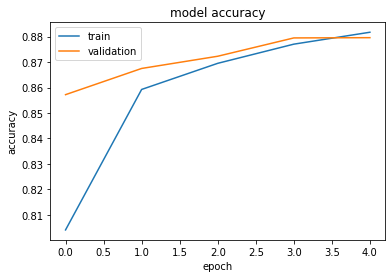

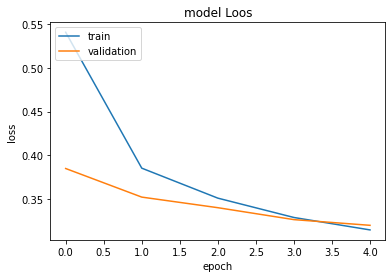

In [ ]:
#هنا لرسم مسار التعلم ومسار التحقق
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#معدل الخطأ في التعلم والاختبار
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model Loos')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()